In [1]:
#Algorytm Adaline ze stochastycznym spadkiem wzdłuż gradientu
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
# zobaczymy jak wygląda granica przebiegająca między etykietami
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    #konfiguracja generatora znaczników i mapy kolorów

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #wykresy powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #narysuj wykres z próbkami

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=colors[idx],
            marker=markers[idx], label=cl,
            edgecolor='black')


In [9]:
class AdalineGD(object):
    """Klasyfikator - ADaptacyjny LIniowy NEuron

    Parametry
    --------
    eta: zmiennoprzecinkowy
        współczynnik uczenia (0.0 - 1.0)
    n_iter: liczba całkowita
            Liczba przebiegów po training set
    shuffle: wartość boolowska
            jeśli True, przetasowane zostaną dane uczące
    random_state: liczba całkowita
            ziarno generatora liczb losowych
    
    Atrybuty
    -------
    w_: jednowymiarowa tablica
        wagi po dopasowaniu
    cost_: lista
            suma kwadratów błędów w każdej epoce
    """

    def __init__ (self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """Trenowanie za pomocą danych uczących

        Parametry
        --------
        X: {tablicopodobny}, wymiary [n_probek, n_cech]
            wektory uczenia
        y: {tablicopodobny}, wymiary [n_probek]
            wartości docelowe
        Zwraca
        -----
        self: obiekt
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _update_weights(self, xi, target):
        """Wykorzystuje reguły uczenia Adaline do aktualizacji wag"""
        net_input = self.net_input(xi)
        output = self.activation(net_input)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = (error**2) / 2.0
        return cost

    def _initialize_weights(self, m):
        """Inicjuzje wagi, przydzielając im małe, losowe wagi"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def partial_fit(self, X, y):
        """Dopasowanie danych uczących bez ponownej inicjacji wag"""
        if not self.w_initialized:
            self._initia

    def net_input(self, X):
        """Oblicza całkowite pobudzenie"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Oblicza liniową funkcję aktywacji"""
        return X

    def predict(self, X):
        """Zwraca rtykietę klas po wykonaniu skoku jednostkowego"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    def _shuffle(self, X, y):
        """Tasowanie danych"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
#dane są posegregowane 
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
     header=None)

#wybieramy 2 odmiany i zamieniamy je na 1 i -1
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#tu wybieramy działki i długość płatka
X = df.iloc[0:100, [0, 2]].values
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

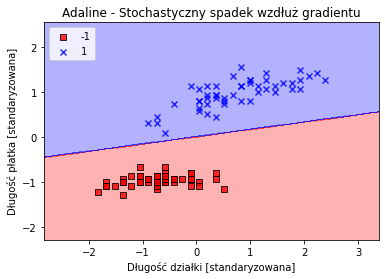

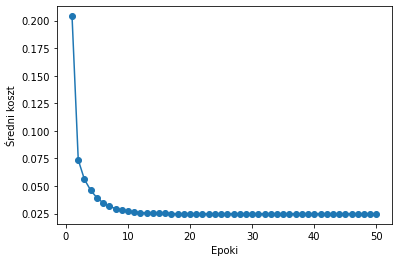

In [16]:
ada = AdalineGD(n_iter=50, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastyczny spadek wzdłuż gradientu')
plt.xlabel('Długość działki [standaryzowana]')
plt.ylabel('Długość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Średni koszt')
plt.show()